# Exploratory Analysis
The main goal of this notebook is to realize the exploratory analysis of the data set. First part consist of checking for NA values, outliers and distribution shape of the feature. Second part is trying different scalers to see how they affect the distribution. Final part would be to clipp values.

## Data description

The total data set consists of the file "2014_features_and_target". For this EDA, only the first 20 most important variables were selected. To separate the data into train and validation data it was splitted without shuffing the data. The train is in the form:

$$TrainData = data[:TrainPortion]$$
$$ValData = data[TrainPortion:]$$

The logic of the model is to use reshape the data from [n_samples,20] to [n_samples,20,1], so it can be feeded into the 1D ConvNet.

## Importing modules

In [1]:
import os
file_path = 'C:\\Users\\Antonio\\Desktop\\Msc CSML\\Thesis Project\\Code' # We set the main working directory
os.chdir(file_path)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler,QuantileTransformer, RobustScaler

## Helper functions

In [7]:
def get_data(file,memory_size):
    '''
    This function reads only the file until the amount of memory defined in the parameters.
    '''
    df_ls = []
    memory_usage = 0
    for partial_data in pd.read_csv(file,
                               chunksize=5000):
        memory_usage += partial_data.memory_usage().sum()
        df_ls.append(partial_data)
        if memory_usage > memory_size: break
    total_data = pd.concat(df_ls)
    
    return total_data


def plot_hist(data,col_names,title,nrows,ncols):
    '''
    This functions plot the histograms of the data based in the number of cols and rows.
    '''
    k = 0
    nrows = nrows
    ncols = ncols
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*6,nrows*4))
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].hist(data[:,k],bins=15,color='blue')   
            axes[i,j].set_title(col_names[k]+" histogram")
            k = k+1
    fig.suptitle(title)
    plt.show()
    
def plot_line(data,col_names,title,nrows,ncols):
    
    '''
    This functions plot the scatter plos of the data based in the number of cols and rows.
    '''
    k = 0
    nrows = nrows
    ncols = ncols
    fig, axes = plt.subplots(nrows, ncols,figsize = (ncols*6,nrows*4))
    for i in range(nrows):
        for j in range(ncols):
            axes[i,j].plot(data[:,k])   
            axes[i,j].set_title(col_names[k])
            k = k+1
    fig.suptitle(title)
    plt.show()
    
def general_scaler(method = 'standard'):
    
    '''
    Basic function just to define 3 types of scalers: Standard, Quantile and Robust.
    '''
    
    if method not in ['standard','quantile','robust']:
        print('Error: the method argument must be a string pointing to one of the 3 valid methods')
        return
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'quantile':
        scaler = QuantileTransformer(output_distribution = 'normal')
    elif method == 'robust':
        scaler = RobustScaler()
        
    return scaler

## Importing modules and reading data

In [3]:
### Reading the data
file_name = 'total_data.csv'

financial_data = pd.read_csv('./Data/'+file_name)

financial_data.isnull().any() # We check for NA in the columns
financial_data = financial_data.iloc[:,2:] # We dont need the DateTime and the info is already sorted in increasing

In [4]:
financial_data.isnull().any()

label_rol                        False
NormRange                        False
SI_MPC_1                         False
MeanRange                        False
ADX1000R                         False
VolatilityDelta_EWMA200R_VWAP    False
NDI500R                          False
EWMA100R_sigma_VWAP              False
VolaNorm_sigma_to_50R            False
EWMA200R_MeanRange               False
RelDelta_EWMA200R_VWAP           False
MACD200R10R_Close                False
PDI500R                          False
NDI150R                          False
MACD200R10R_VWAP                 False
ADX500R                          False
ACC_SWING_INDEX_MPC_1            False
PDI1000R                         False
NDI1000R                         False
ADX200R                          False
ACC_SWING_INDEX_MPC_20           False
dtype: bool

## Descriptive statistics

In [4]:
'''
In this section we are going to do a general exploratory analysis. Histograms to check the shape of the distribution,
box plots to check for outliers. We are going to try different strechers to reshape the shape of the data based in the
in the activation function we are going to use. In this case ReLU.
'''
## We check for a summary of the information
print(financial_data.describe())

          label_rol     NormRange      SI_MPC_1     MeanRange      ADX1000R  \
count  1.057367e+06  1.057367e+06  1.057367e+06  1.057367e+06  1.057367e+06   
mean   1.335298e-02  1.879249e-04  1.553886e+01  7.792195e-01  2.413724e+00   
std    7.245997e-01  7.665627e-05  3.783820e+01  3.261339e-01  1.030631e+00   
min   -1.000000e+00  0.000000e+00 -1.000000e+02  0.000000e+00  6.358170e-01   
25%   -1.000000e+00  1.396463e-04 -5.789027e+00  5.600000e-01  1.663875e+00   
50%    0.000000e+00  1.804034e-04  7.019499e-01  7.500000e-01  2.197609e+00   
75%    1.000000e+00  2.305162e-04  3.753718e+01  9.900000e-01  2.943744e+00   
max    1.000000e+00  2.337955e-03  1.000000e+02  8.660000e+00  1.123726e+01   

       VolatilityDelta_EWMA200R_VWAP       NDI500R  EWMA100R_sigma_VWAP  \
count                   1.057367e+06  1.057367e+06         1.057367e+06   
mean                    9.667964e-02  2.801495e+01         6.760565e+00   
std                     7.511890e-01  2.975923e+00         2.17

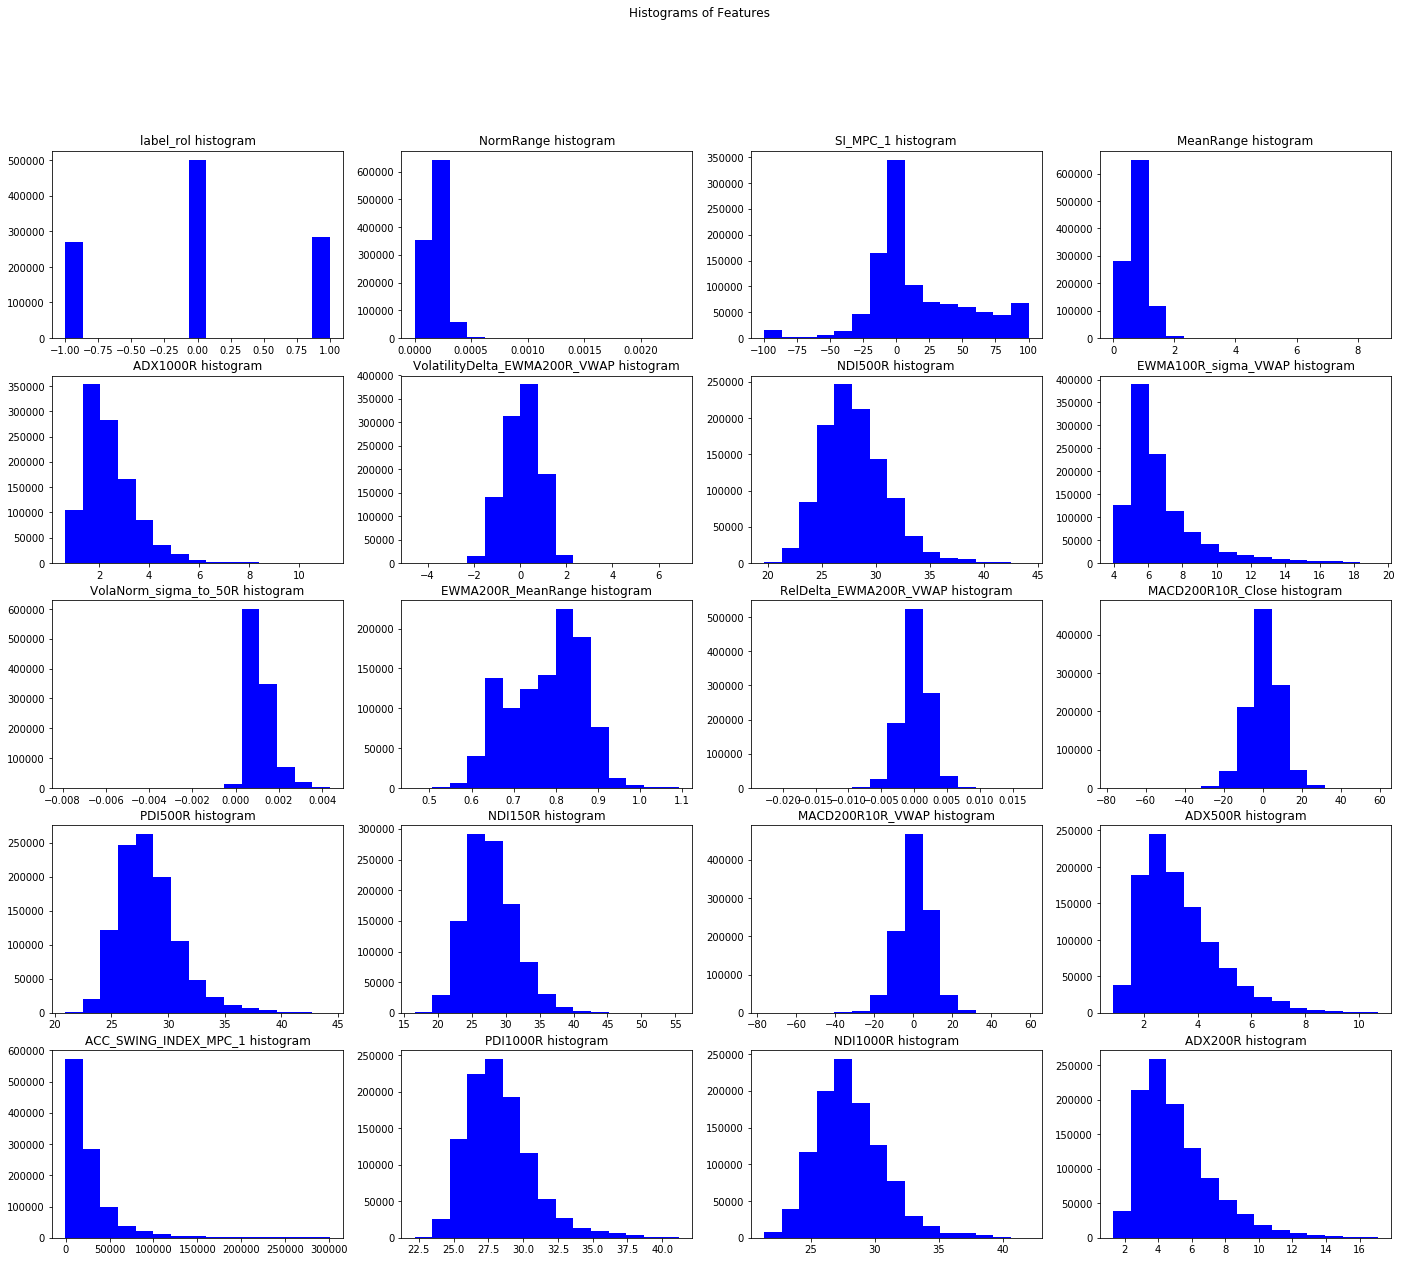

In [5]:
plot_hist(financial_data.iloc[:,1:].values,financial_data.iloc[:,1:].columns,'Histograms of Features',nrows = 5,ncols = 4)

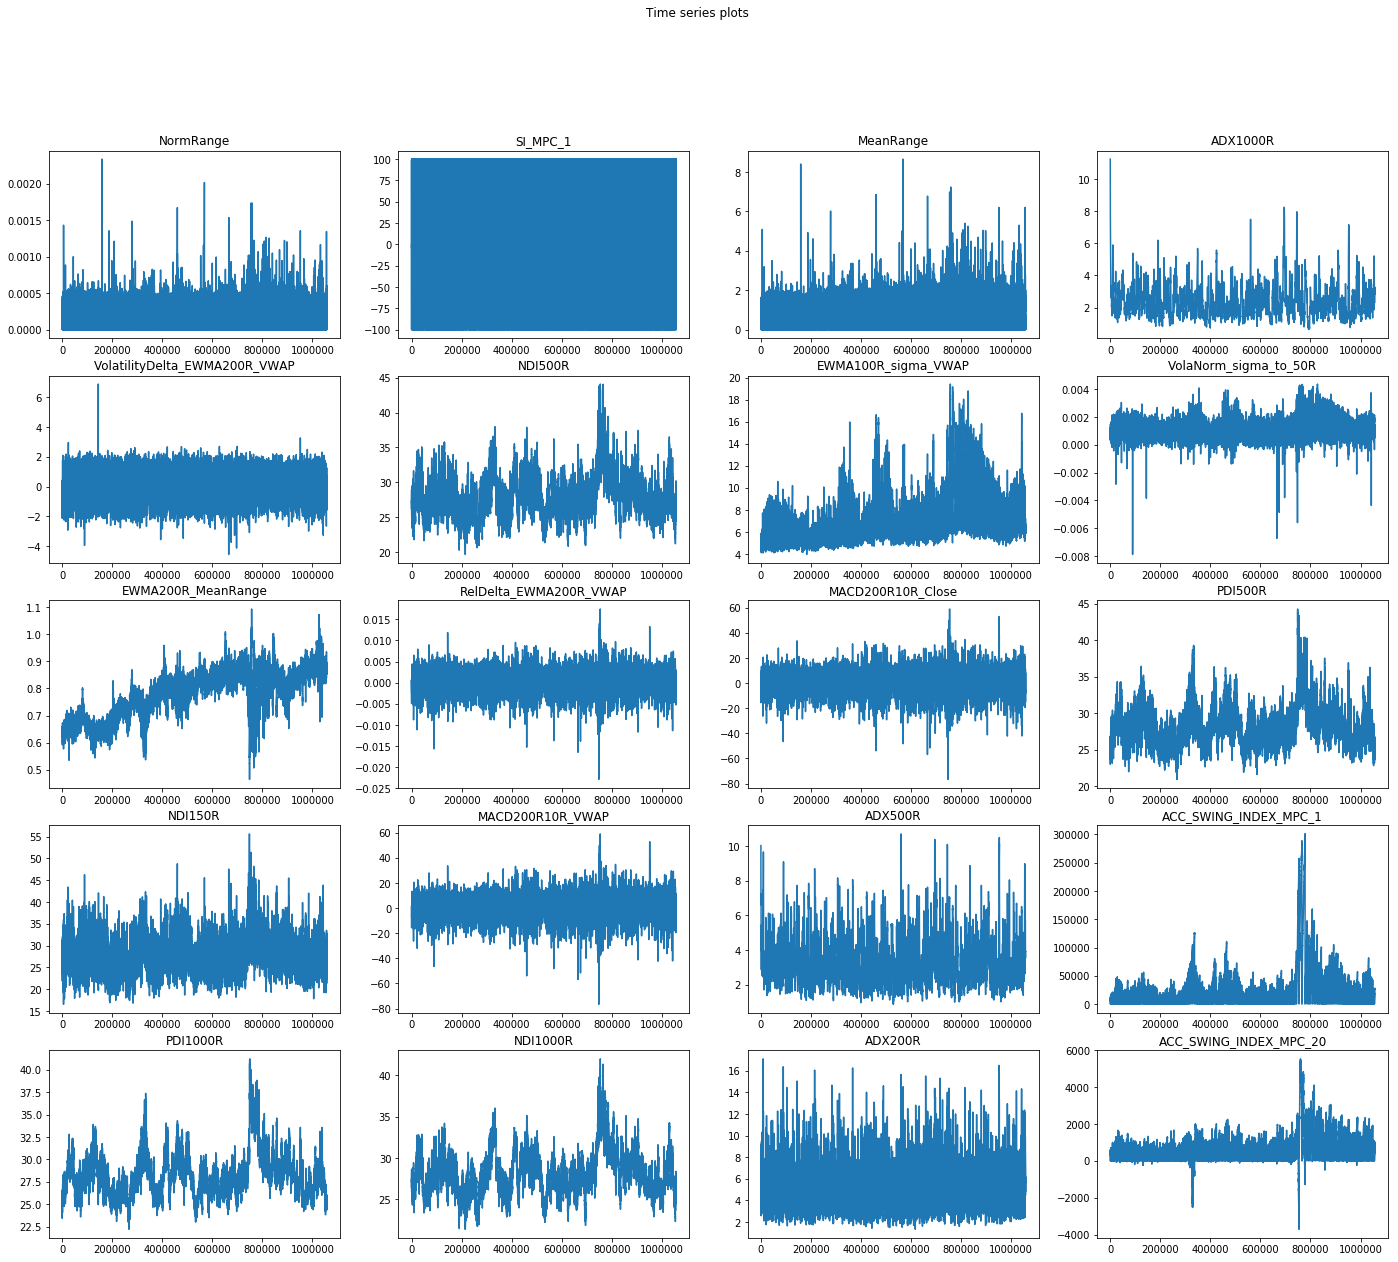

In [8]:
plot_line(financial_data.iloc[:,1:].values,financial_data.iloc[:,1:].columns,'Time series plots',nrows = 5,ncols = 4)

## Fixing shape of feature distributions
Because some the features exhibit left skewness, we are goint to apply a logarithm transformation to see if we can fix this. Also for the case of the feature 'ACC_SWING_INDEX_MP_1', it contains almost just positives values so we are going to convert the few negatives values to positive values to be able to apply the log transformation.

In [20]:
acc_swing = financial_data['ACC_SWING_INDEX_MPC_1'].values
neg_sum = np.sum(acc_swing < 0)
print('Number of negative number corresponding to ACC_SWING_INDEX_MPC_1: {}'.format(neg_sum))
print('This correspond to: {}% of the data'.format(round(neg_sum/financial_data.shape[0]*100,2)))

Number of negative number corresponding to ACC_SWING_INDEX_MPC_1: 1130
This correspond to: 0.11% of the data


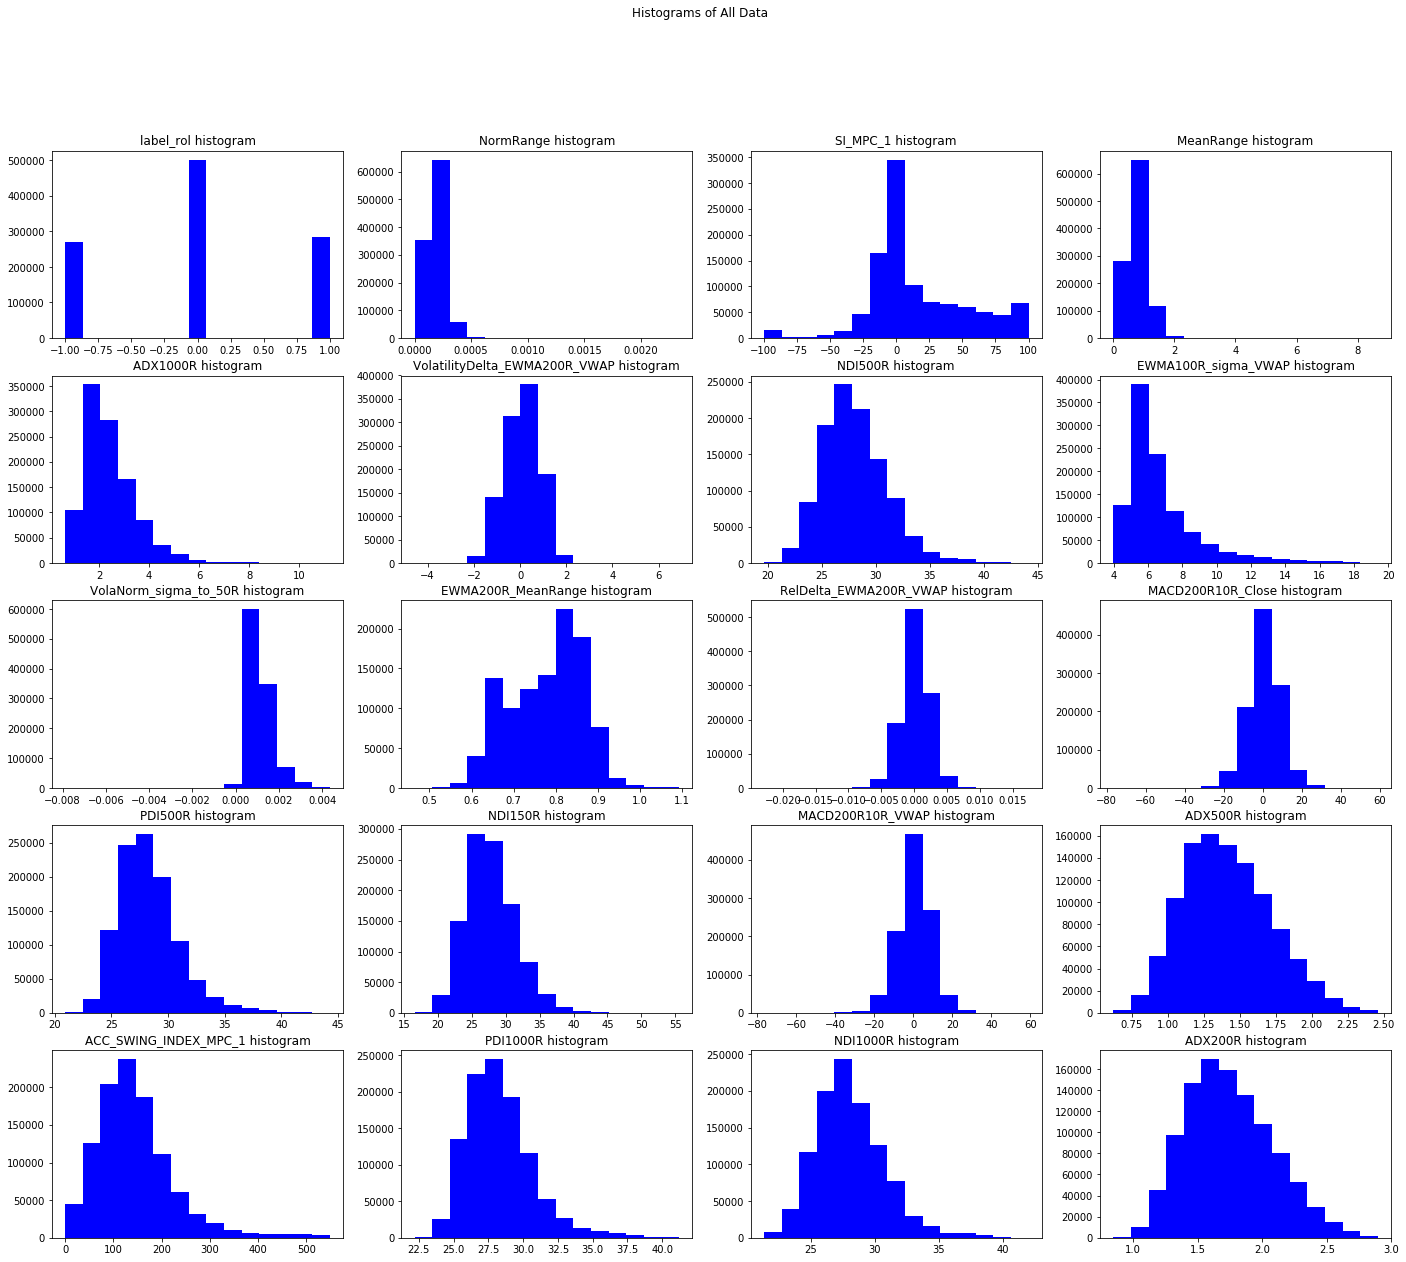

In [21]:
## We are going to apply logarithm to some features that look skewed to the left.
financial_data['ADX200R'] = np.log1p(financial_data['ADX200R'])
financial_data['ADX500R'] = np.log1p(financial_data['ADX500R'])

acc_swing = financial_data['ACC_SWING_INDEX_MPC_1'].values
neg_sum = np.sum(acc_swing < 0)
acc_swing[acc_swing < 0] = 0.001
financial_data['ACC_SWING_INDEX_MPC_1'] = np.sqrt(acc_swing)

## We plot the histograms to observe the changes
plot_hist(financial_data.iloc[:,1:].values,financial_data.iloc[:,1:].columns,'Histograms of All Data',nrows = 5,ncols = 4)

## Data preprocessing
In this section we are goint to split the data set into train and validation sets. We are going to process the target into One Hot Encoding label.

In [27]:
train_portion = 0.8
val_size = 1 - train_portion
n_samples = financial_data.shape[0]

train_size = np.int(np.floor(train_portion*n_samples))
val_size = n_samples - train_size

x_data = financial_data.iloc[:,1:].values
y_data = financial_data.iloc[:,:1]

training_label = y_data.iloc[:train_size,:]

# We transform the target into integers and One Hot Encoding
print(y_data['label_rol'].unique()) # We check the number of classes in the target. The classes are: -1,0 and 1
y_data = y_data.values + 1
y_data = y_data.astype(int) # We transform the matrix into integer values
np.unique(y_data) # We check that we fix the negative values in the classes

encoder = OneHotEncoder(sparse = False)
y_data = encoder.fit_transform(y_data)

x_train = x_data[:train_size,:]
x_val = x_data[train_size:,:]

y_train = y_data[:train_size,:]
y_val = y_data[train_size:,:]

[-1.  0.  1.]


## Frequency of classes

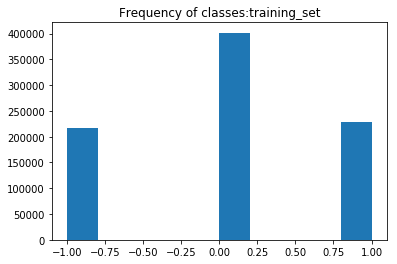

We may have a unbalance class problem in the training set


In [28]:
plt.hist(training_label.values) 
plt.title('Frequency of classes:training_set')
plt.show()
print('We may have a unbalance class problem in the training set')

## Scalers
In this section we are going to try different scalers over the data.

### Standard scaler
Here we tried a standard scaler and create a table with different percentiles to see distribution of the training set.

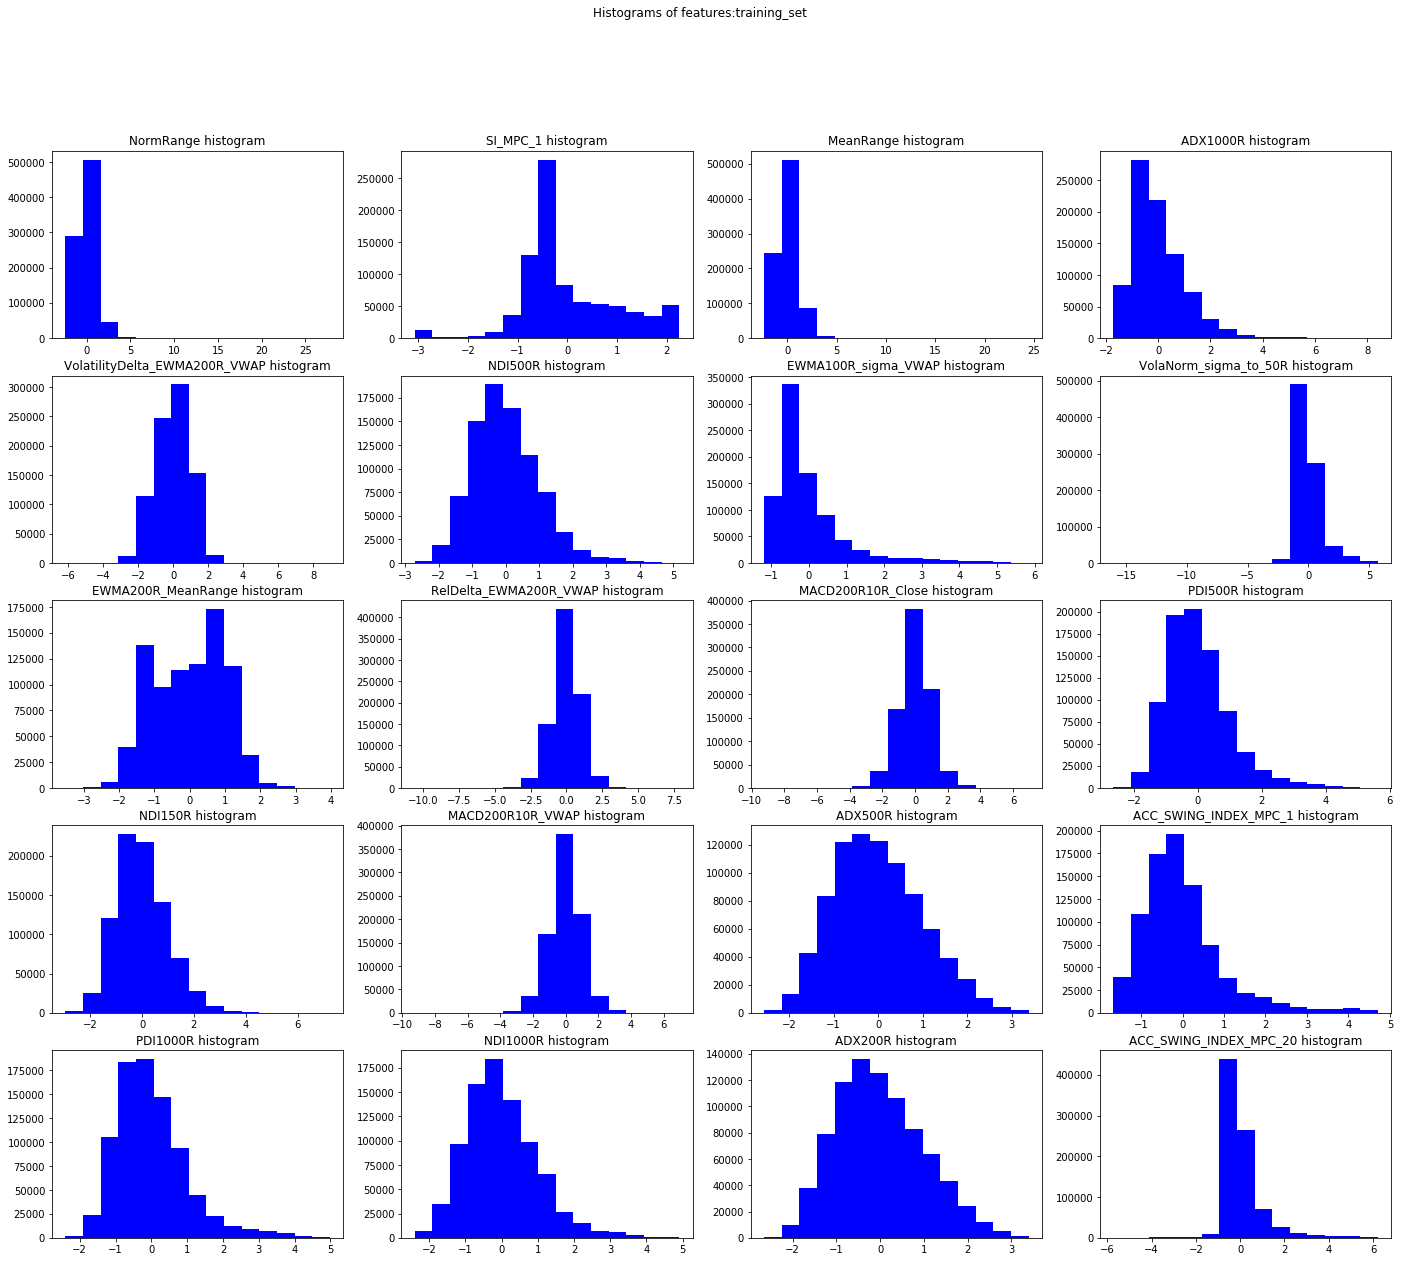

Using the value of 2 to define outliers, the total number of unique outliers is:280508
This represent 0.33 of the total data


In [32]:
scaler = general_scaler(method = 'standard')
features_scaled = scaler.fit_transform(x_train) # it is going to transform the data frame to numpy array.

# We plot the training features
plot_hist(features_scaled,financial_data.columns[1:],'Histograms of features:training_set',nrows = 5,ncols = 4)


min_features = np.round(np.min(features_scaled,axis = 0),2)
max_features = np.round(np.max(features_scaled,axis = 0),2)
percentiles = np.percentile(features_scaled,q = [5,25,50,75,95],axis = 0)
percentiles = np.transpose(np.round(percentiles,2))
percentiles = pd.DataFrame(percentiles,columns = ['Q5','Q25','Q50','Q75','Q95'])

## Getting table with the count of outliers and percentage that correspond for the dataset.
sum_outliers = np.sum(np.abs(features_scaled) > 2,axis = 0)
loss_of_data = np.round(sum_outliers / features_scaled.shape[0],2)

outliers_table = pd.DataFrame({'Feature': financial_data.columns[1:],'#_outliers': sum_outliers,
                               '%_outliers':loss_of_data*100})
outliers_table = outliers_table[['Feature','#_outliers','%_outliers']]
outliers_table = pd.concat([outliers_table,percentiles],axis = 1)
outliers_table = outliers_table.assign(Min = min_features, Max = max_features)                                
                                
n_unique_outliers = np.sum((np.abs(features_scaled) > 2).any(1))
print('Using the value of 2 to define outliers, the total number of unique outliers is:{}'.format(n_unique_outliers))
print('This represent {} of the total data'.format(np.round(n_unique_outliers/features_scaled.shape[0],2)))

In [33]:
print(outliers_table)

                          Feature  #_outliers  %_outliers    Q5   Q25   Q50  \
0                       NormRange       56884         7.0 -1.50 -0.63 -0.09   
1                        SI_MPC_1       61405         7.0 -1.12 -0.56 -0.39   
2                       MeanRange       58437         7.0 -1.52 -0.72 -0.04   
3                        ADX1000R       35255         4.0 -1.20 -0.73 -0.21   
4   VolatilityDelta_EWMA200R_VWAP       28524         3.0 -1.69 -0.73  0.06   
5                         NDI500R       33050         4.0 -1.44 -0.71 -0.11   
6             EWMA100R_sigma_VWAP       46102         5.0 -0.84 -0.61 -0.32   
7           VolaNorm_sigma_to_50R       45402         5.0 -1.13 -0.56 -0.22   
8              EWMA200R_MeanRange       12886         2.0 -1.55 -0.90  0.10   
9          RelDelta_EWMA200R_VWAP       42518         5.0 -1.66 -0.60  0.04   
10              MACD200R10R_Close       43124         5.0 -1.67 -0.60  0.04   
11                        PDI500R       36902       

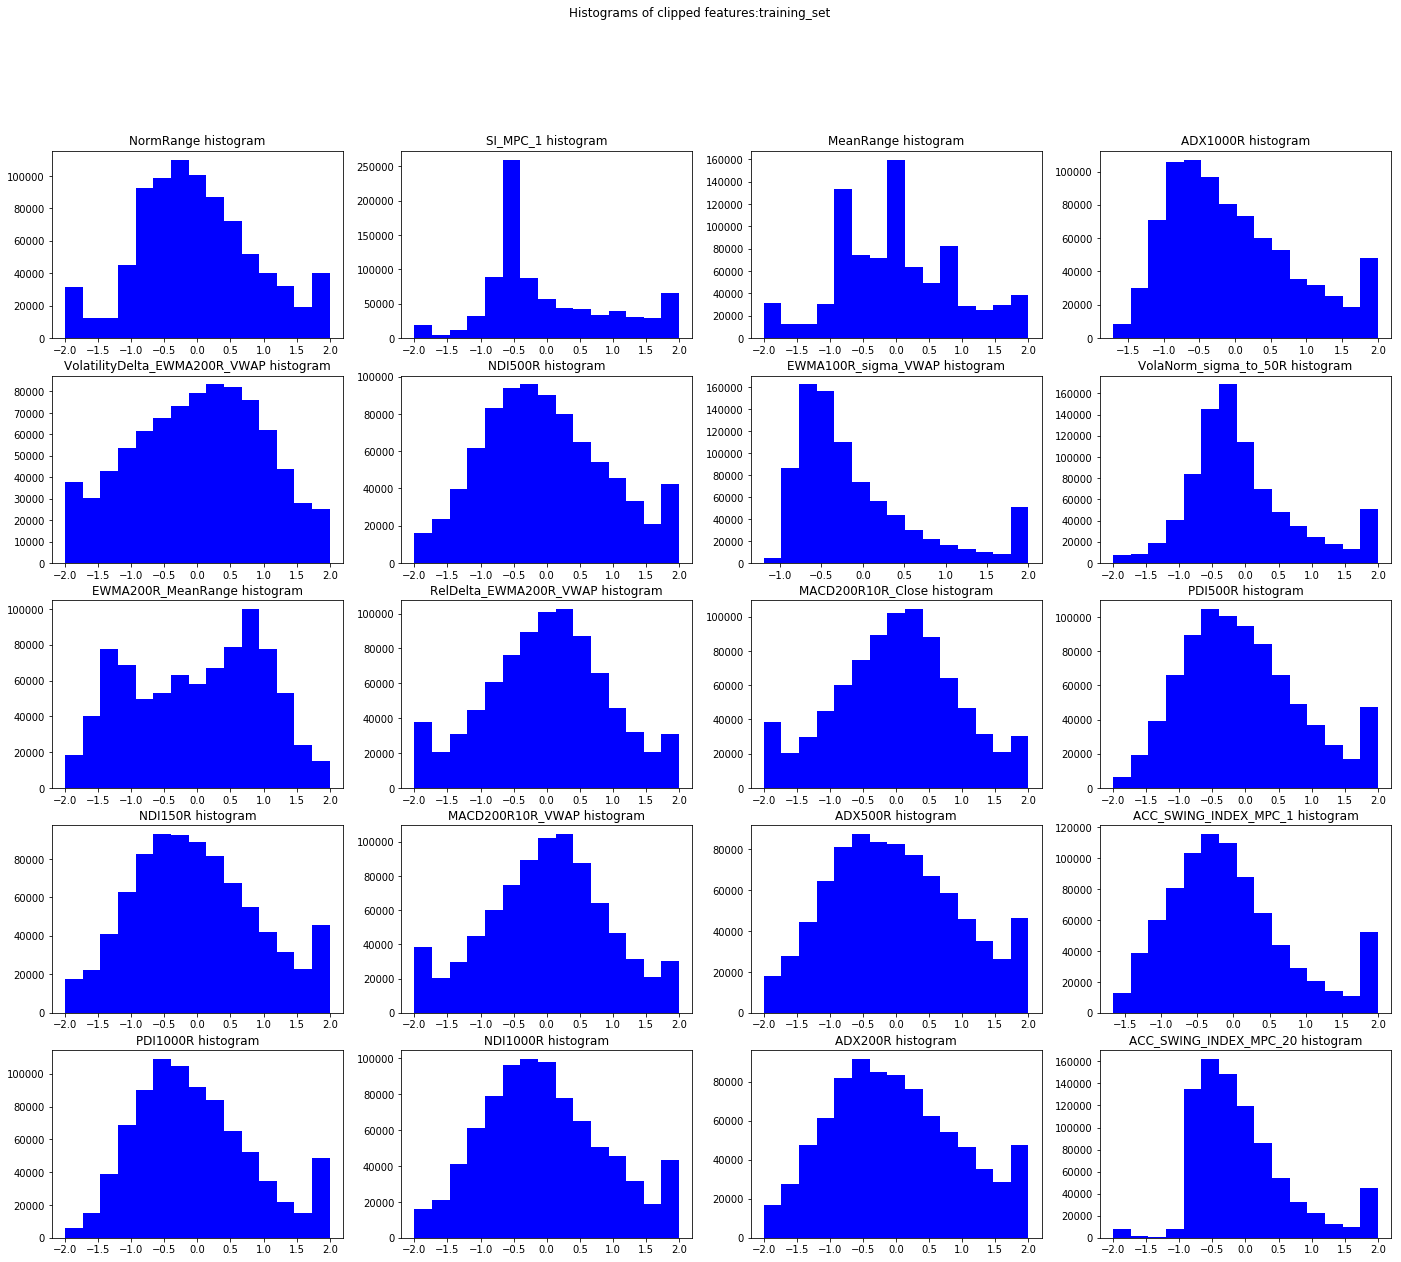

In [36]:
## We are going to clip the training features
features_cleaned = np.copy(features_scaled)
features_cleaned[features_scaled > 2] = 2
features_cleaned[features_scaled < -2] = -2

plot_hist(features_cleaned,financial_data.columns[1:],'Histograms of clipped features:training_set',nrows = 5,ncols = 4)

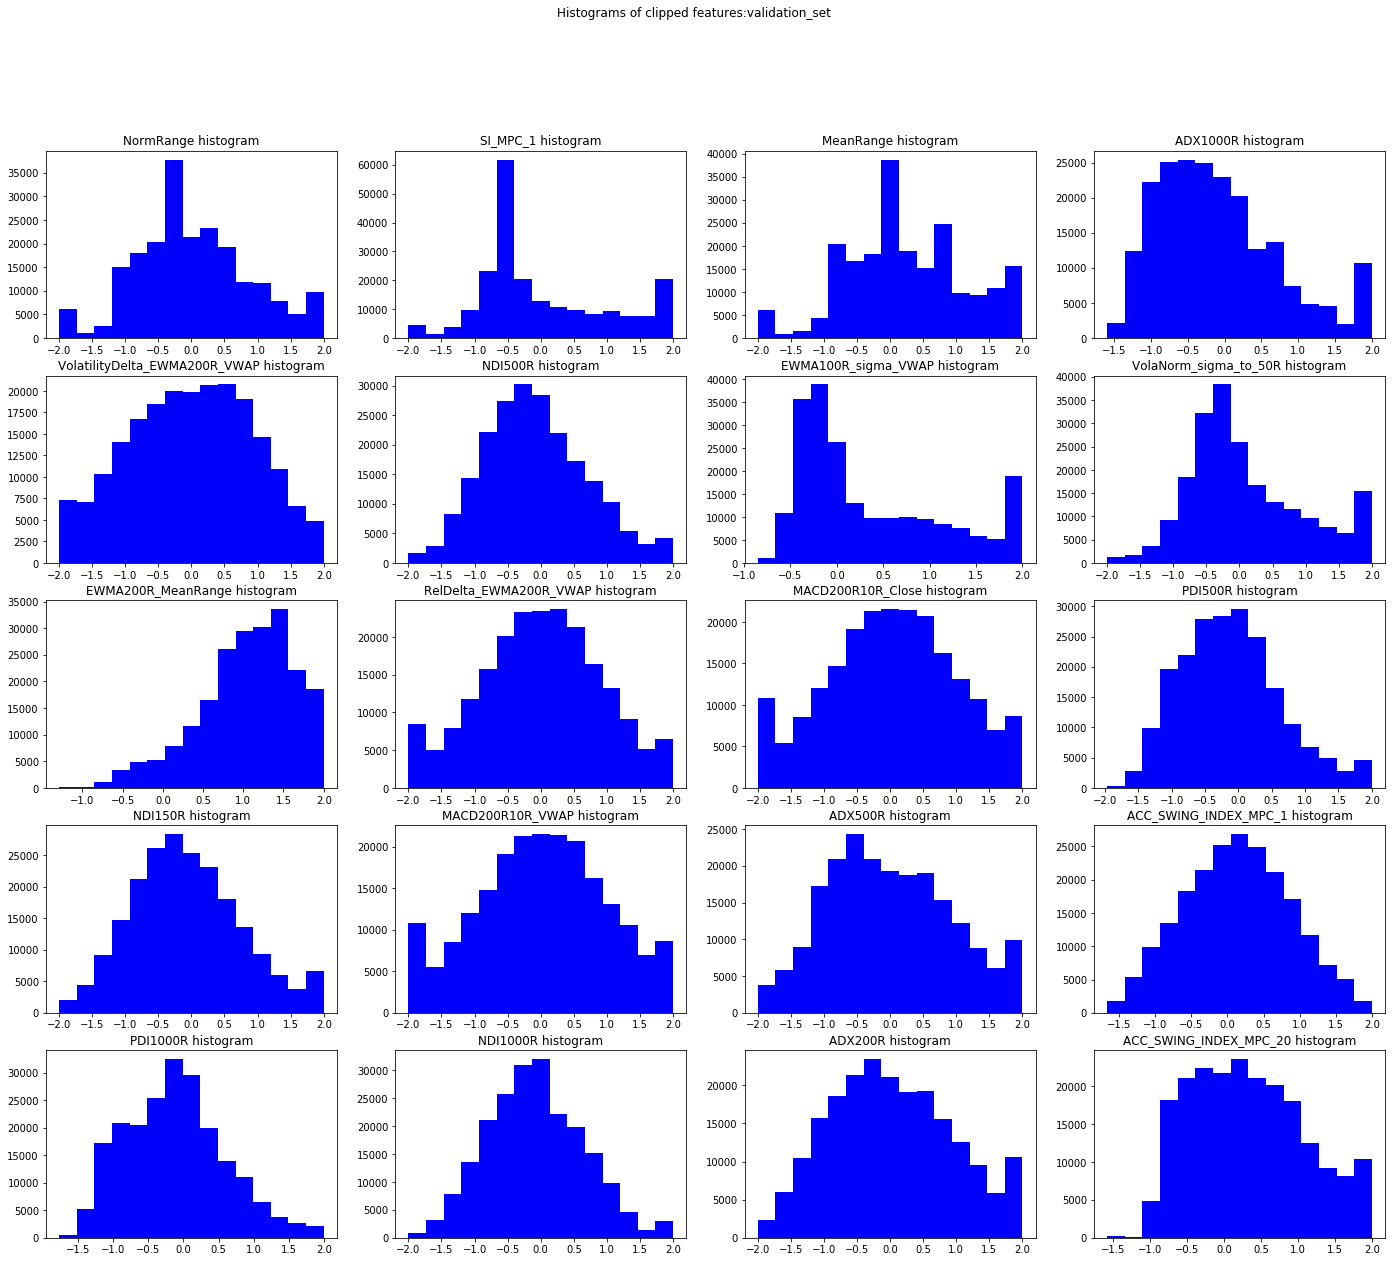

In [37]:
## Now we clipp the test features
final_x_val = scaler.transform(x_val) # We use the scaler trained with the training set

final_x_val[final_x_val > 2] = 2
final_x_val[final_x_val < -2] = -2

plot_hist(final_x_val,financial_data.columns[1:],'Histograms of clipped features:validation_set',nrows = 5,ncols = 4)

## Quantile scaler

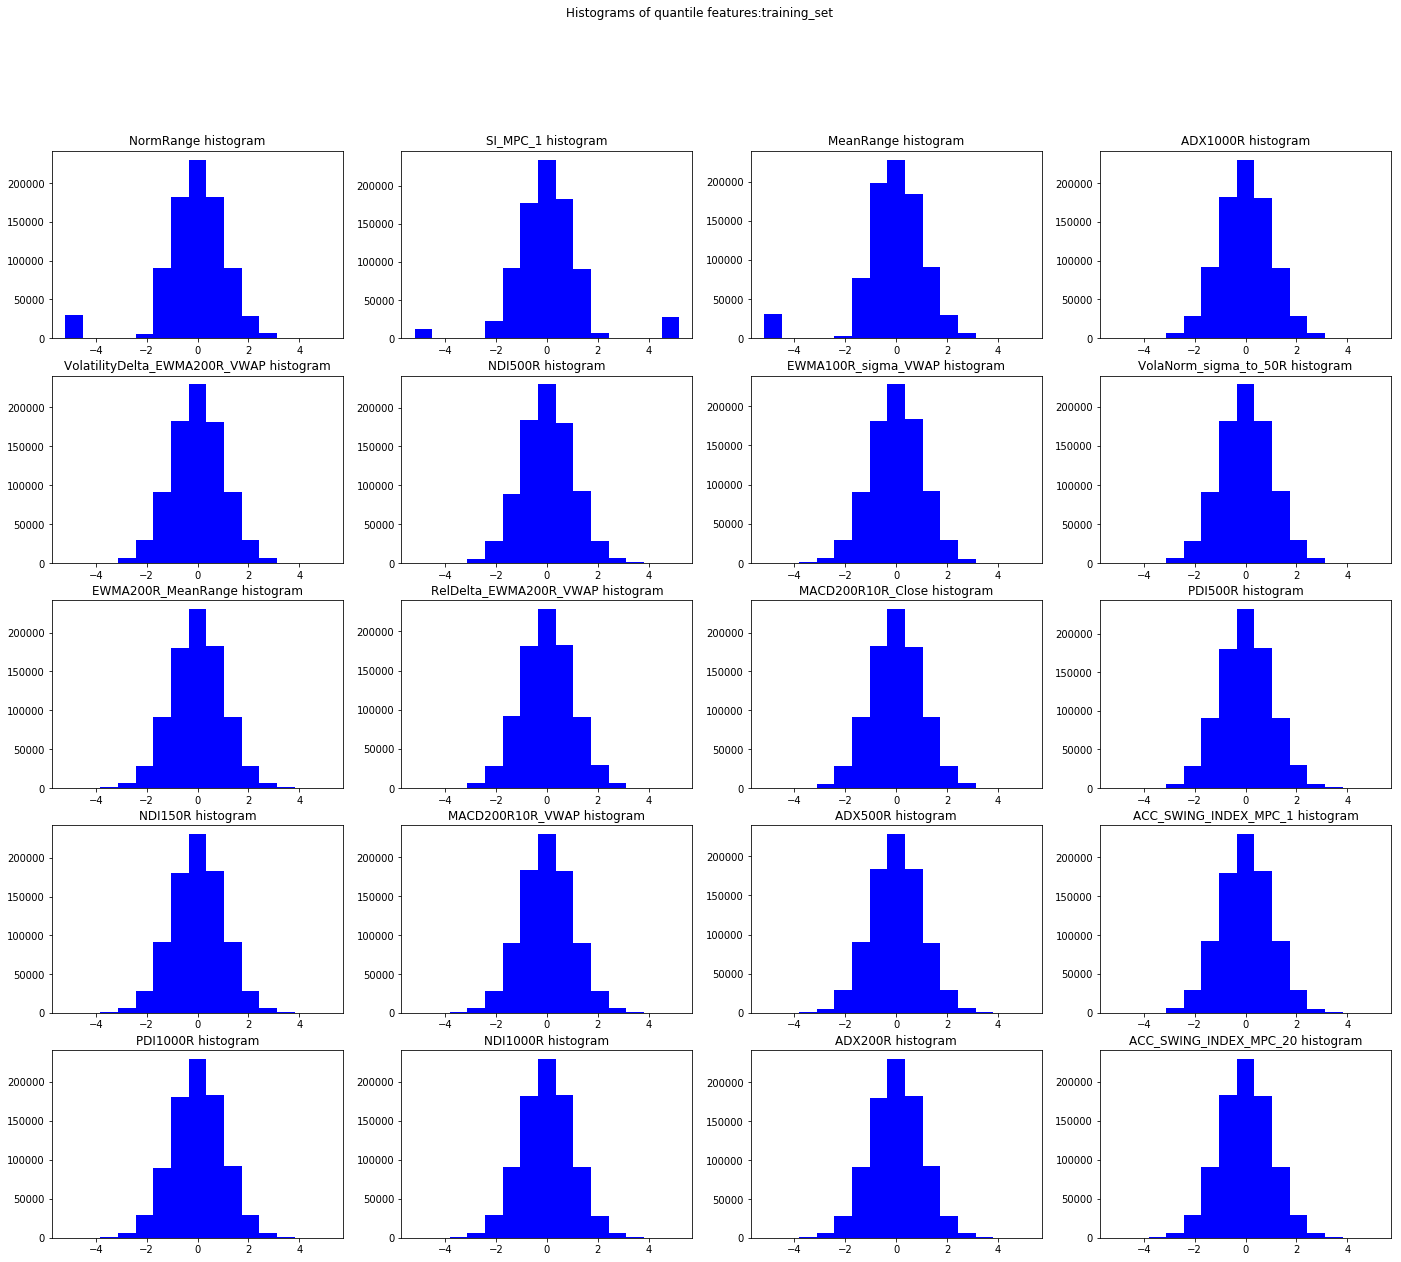

In [38]:
scaler = general_scaler(method = 'quantile')
features_scaled = scaler.fit_transform(x_train) # it is going to transform the data frame to numpy array.
plot_hist(features_scaled,financial_data.columns[1:],'Histograms of quantile features:training_set',nrows = 5,ncols = 4)

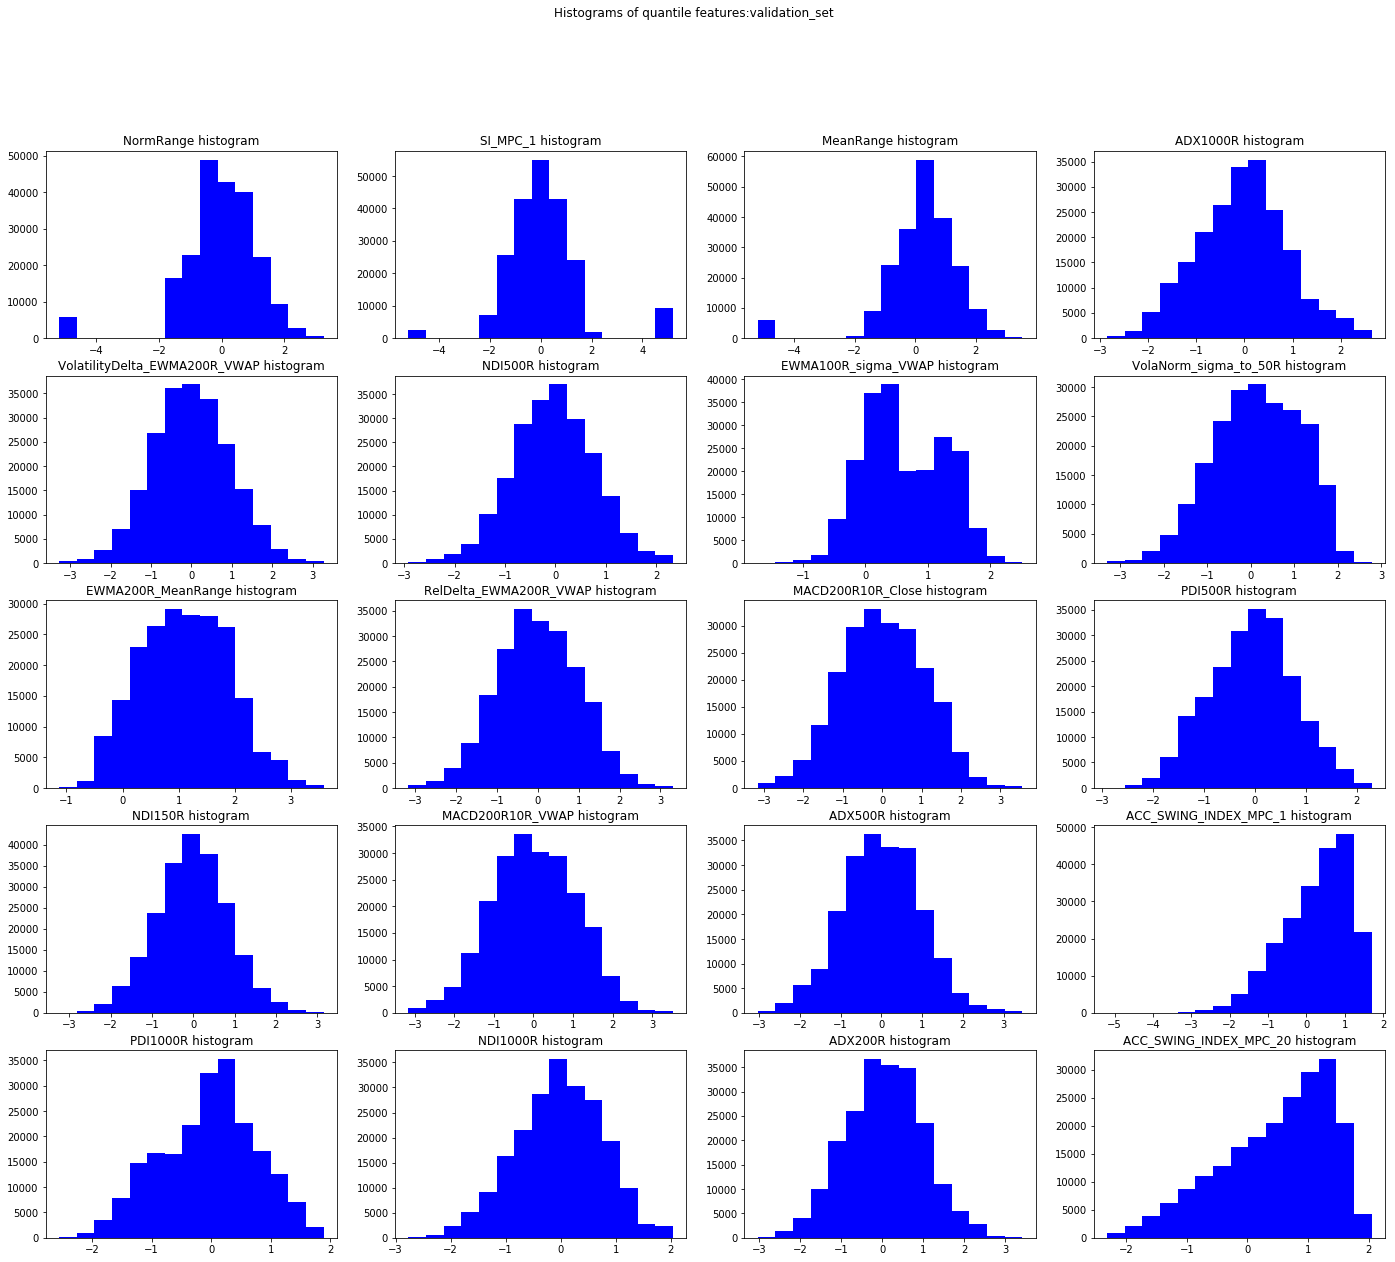

In [39]:
scaled_x_val = scaler.transform(x_val) # it is going to transform the data frame to numpy array.
plot_hist(scaled_x_val,financial_data.columns[1:],'Histograms of quantile features:validation_set',nrows = 5,ncols = 4)

## Robust scaler

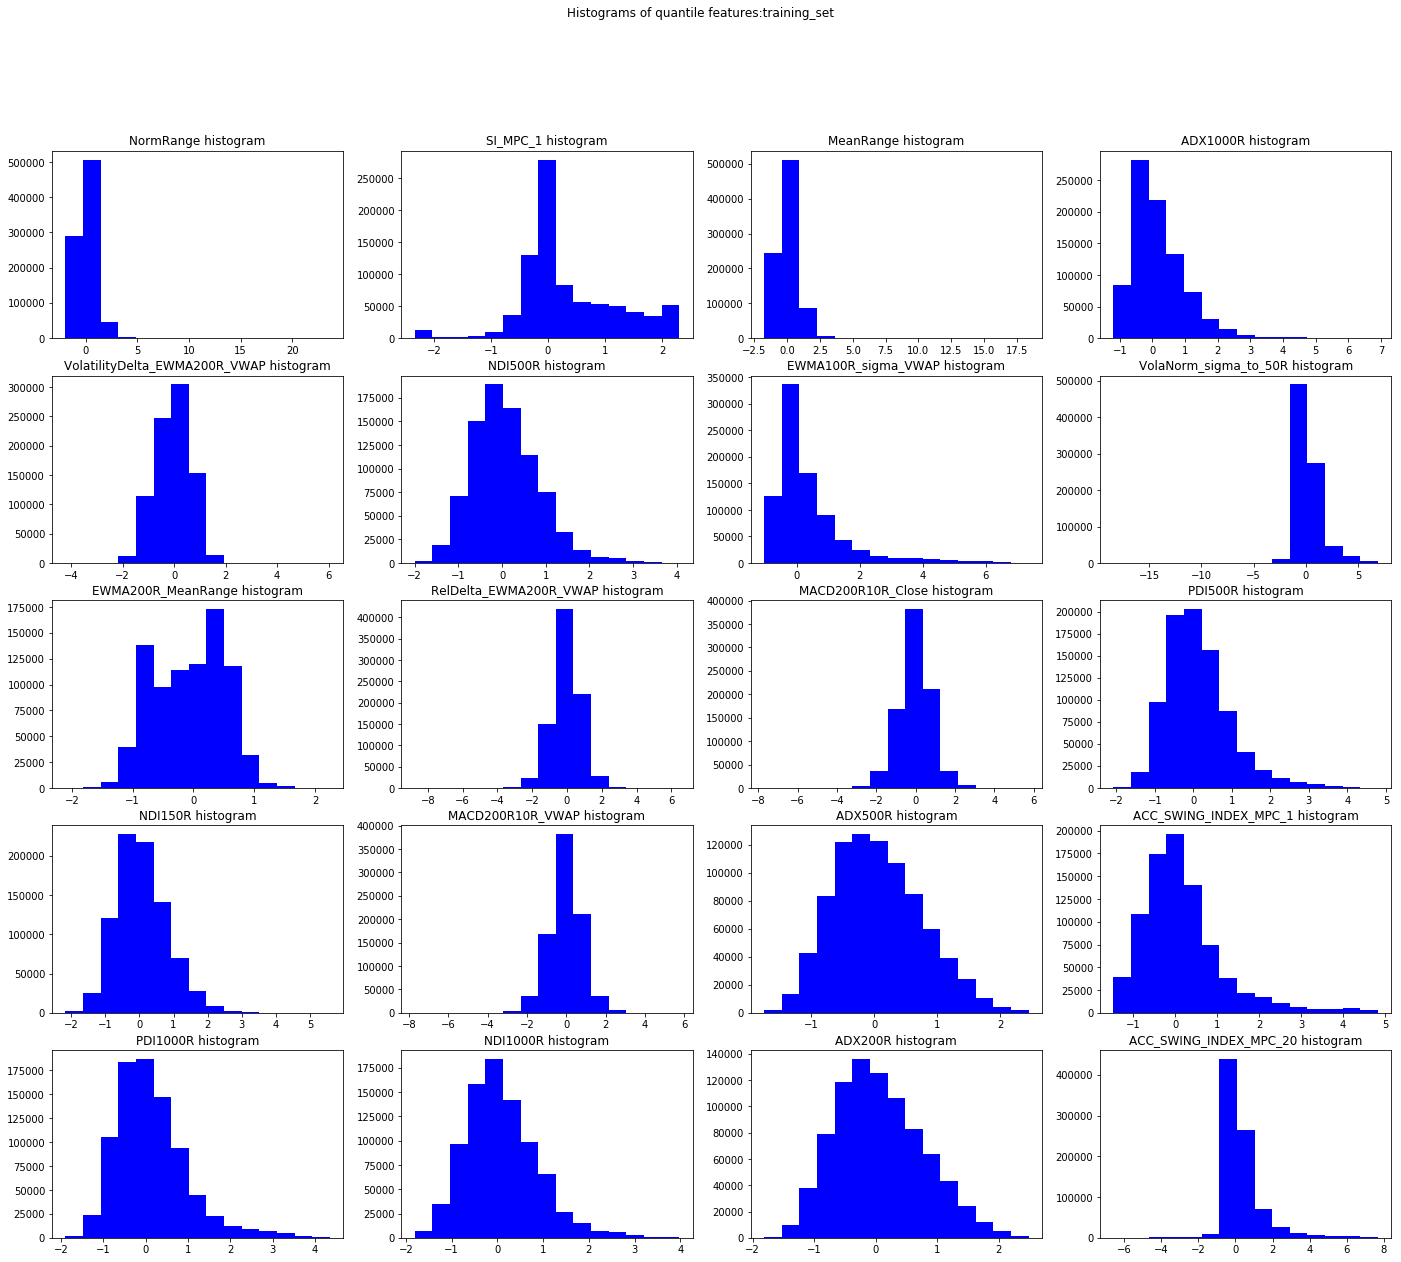

In [40]:
scaler = general_scaler(method = 'robust')
features_scaled = scaler.fit_transform(x_train) # it is going to transform the data frame to numpy array.
plot_hist(features_scaled,financial_data.columns[1:],'Histograms of quantile features:training_set',nrows = 5,ncols = 4)

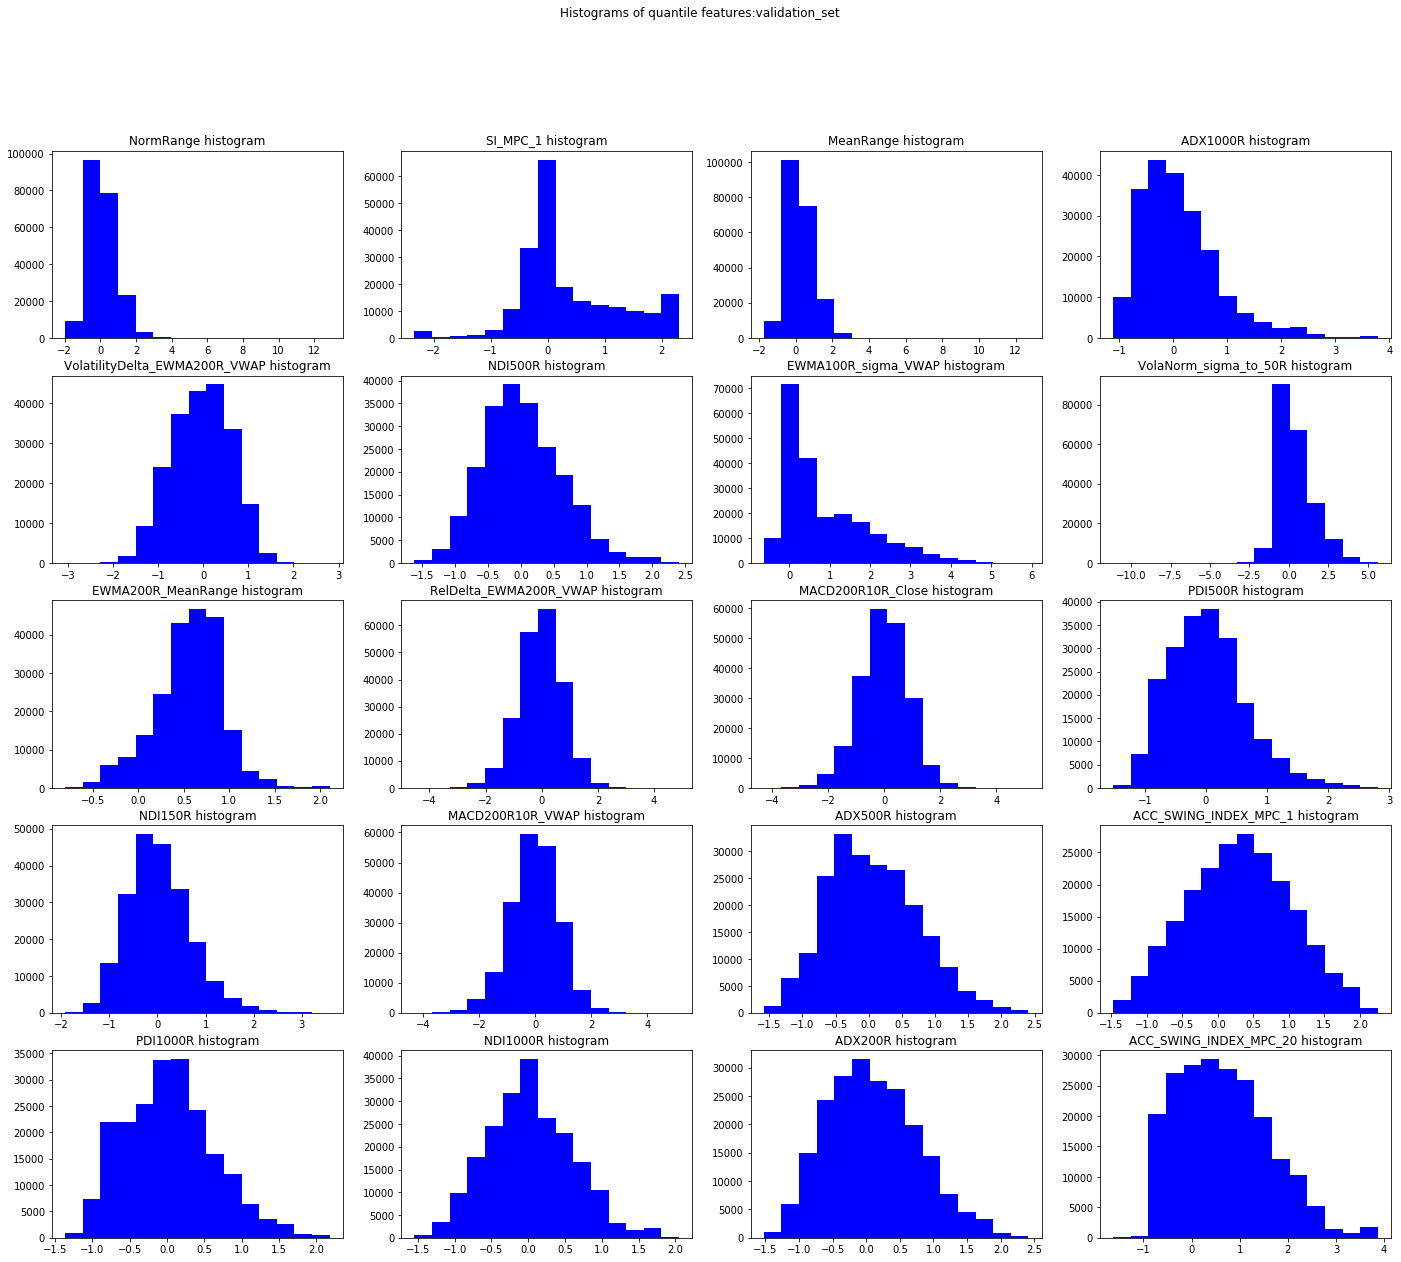

In [42]:
scaled_x_val = scaler.transform(x_val) # it is going to transform the data frame to numpy array.
plot_hist(scaled_x_val,financial_data.columns[1:],'Histograms of quantile features:validation_set',nrows = 5,ncols = 4)